Морфологический анализ <br/>
Домашнее задание 2 <br/>
**Голев Александр 135М**

# При помощи фильтра Собеля
Выделить границы нефтяных пятен на рис. 1. Объяснить отличие результата от идеального (пропуски границ и «ложные срабатывания»), исходя из алгоритма работы фильтра.

<img src=".\image-001.png" alt="image-001" style="zoom:50%;" />

In [1]:
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем изображение
image_name = 'image-001.png'
image = cv2.imread(image_name)

In [3]:
# Преобразование изображения в полутоновое
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.dtype)

uint8


In [4]:
# Гаусов фильтр ( kernel size = 3 )
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)


float64
uint8


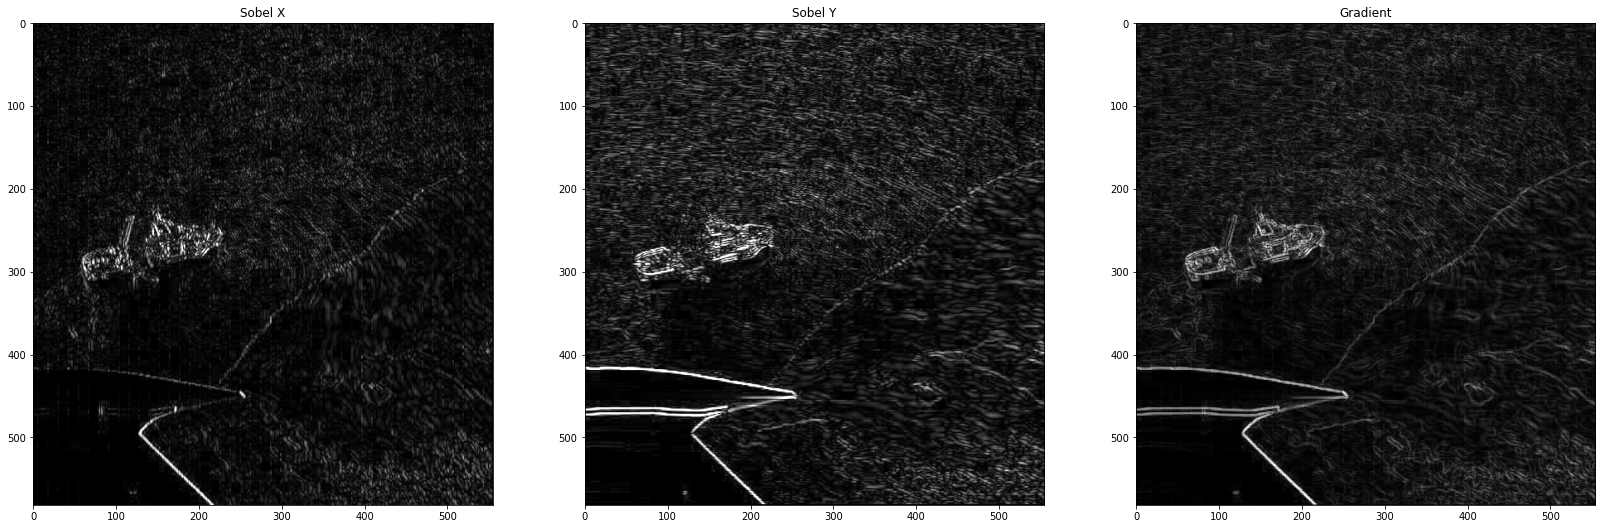

In [5]:
# Применим фильтр Собеля для обнаружения вертикальных границ
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
print(sobel_x.dtype)
# Применим фильтр Собеля для обнаружения горизонтальных границ
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Преобразуйте результат в формат uint8 (8-битное изображение)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
print(sobel_x.dtype)
# Объедините результаты горизонтального и вертикального фильтров для получения общего градиента
gradient = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5,0)

#gradient = np.sqrt(sobel_x**2 + sobel_y**2)
#gradient = np.uint8(gradient)

# Отобразите изображение с обнаруженными границами
plt.figure(figsize=(28, 14))

plt.subplot(1, 3, 1)
plt.title('Sobel X')
plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Sobel Y')
plt.imshow(cv2.cvtColor(sobel_y, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Gradient')
plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

plt.show()

## Фильтр Кенни

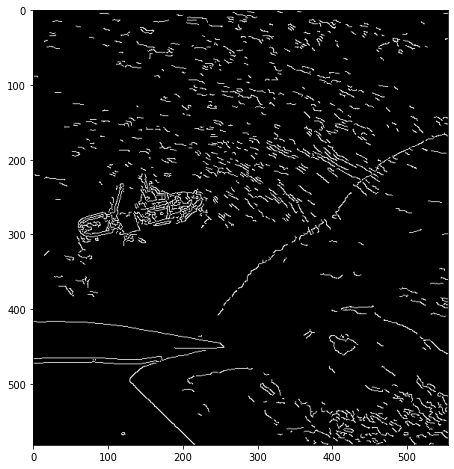

In [6]:
# Применим фильтр Кенни
edges = cv2.Canny(blurred_image, threshold1=70, threshold2=105, apertureSize = 3)
plt.figure(figsize=(14, 8))
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_RGB2BGR), cmap='brg')

## Преобразование Хафа

In [7]:
line_img = cv2.imread('image-002.png')


### Для линий

In [8]:
def showLines(img1, img2):

    plt.figure(figsize=(28, 14))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Detected Lines')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

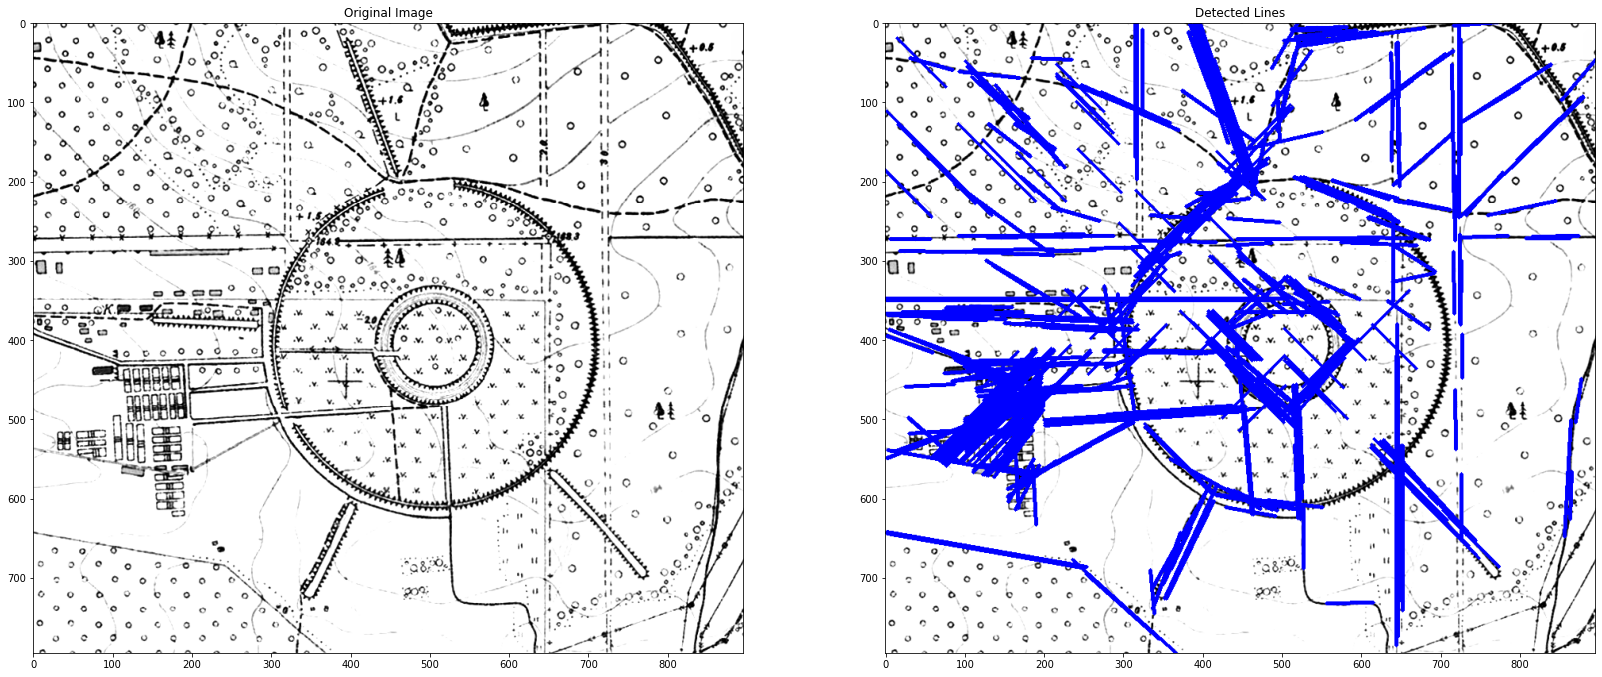

In [9]:
line_copy = line_img.copy()
# Преобразеи изображение в оттенки серого
line_gray = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)


# Применим детектор границ (например, фильтр Кенни)
line_edges = cv2.Canny(line_gray, threshold1=50, threshold2=150)

# Применим преобразование Хафа для обнаружения прямых линий
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 120  # minimum number of votes (intersections in Hough grid cell)
minLineLength = 50  # minimum number of pixels making up a line
maxLineGap = 10  # maximum gap in pixels between connectable line segments
lines = cv2.HoughLinesP(line_edges, rho, theta, threshold=120, minLineLength = minLineLength, maxLineGap = maxLineGap)
# Нарисуйте обнаруженные линии на изображении
i = 0
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_copy,(x1,y1),(x2,y2),(255,0,0),3)

showLines(line_img, line_copy)

### Для кружков

In [10]:
def showCircle(img1, img2):
    plt.figure(figsize=(28, 14))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Detected Circles')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()

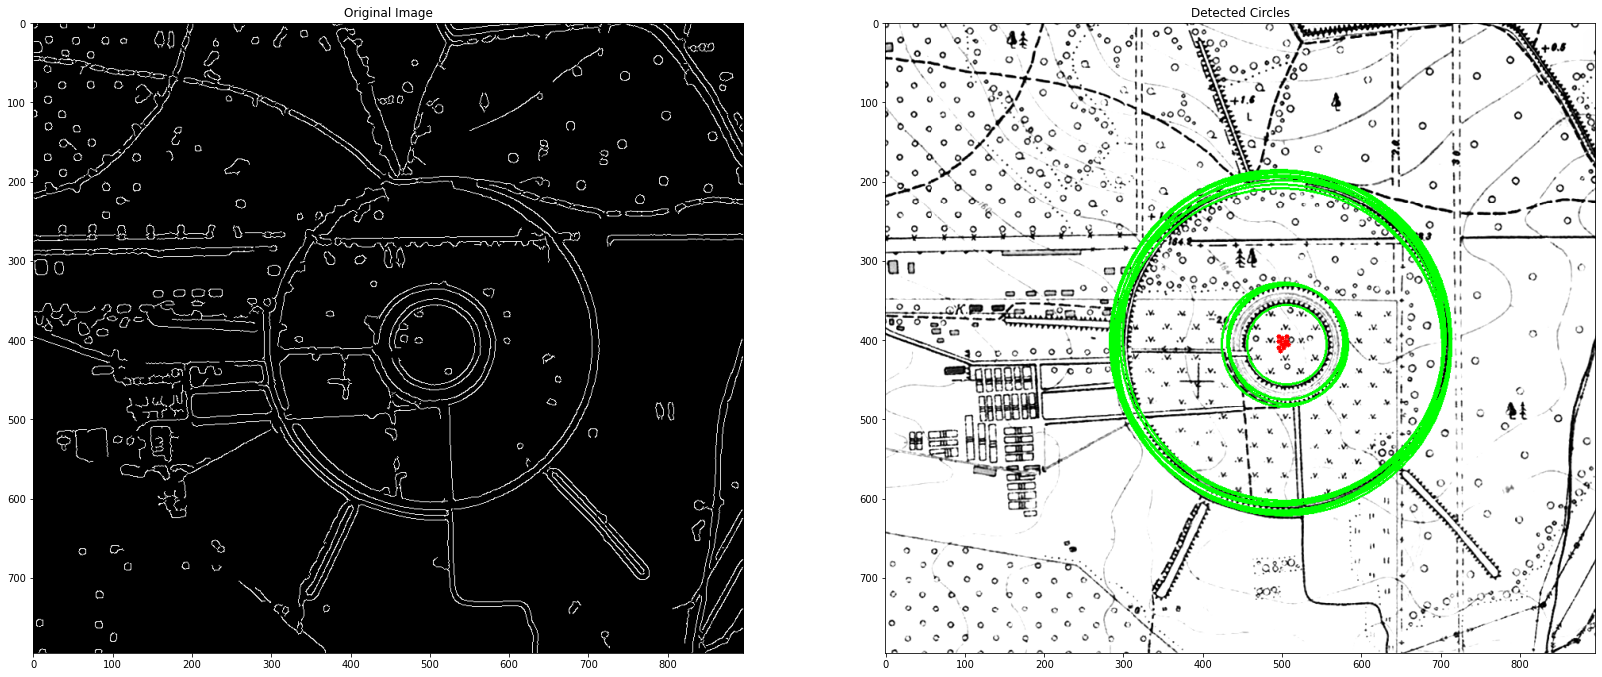

In [12]:
circle_copy = line_img.copy()
# Применим детектор кругов
minDist = 1 #	Minimum distance between the centers of the detected circles
param1 = 1000	 # The higher threshold of the two passed to the Canny edge detector 
param2	= 150  # The accumulator threshold for the circle centers at the detection stage.
minRadius = 5	#Minimum circle radius.
maxRadius = 1000	#Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuses.

line_blur = cv2.GaussianBlur(line_gray, (15, 15),3)
line_edges = cv2.Canny(line_blur, threshold1=50, threshold2=150)

circles = cv2.HoughCircles(
    line_edges, 
    cv2.HOUGH_GRADIENT, dp =1, minDist = minDist, param1 = param1, param2 = param2, minRadius = minRadius, maxRadius = maxRadius)

# Если найдены круги, нарисуйте их на изображении
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        # Нарисовать окружность
        cv2.circle(circle_copy, center, radius, (0, 255, 0), 2)
        cv2.circle(circle_copy, center, 0, (0, 0, 255), 5)

showCircle(line_edges, circle_copy)